# EDA Project - King County Housing

### Stakeholder:
Jacob Phillips, buyer, unlimited Budget

#### He wants:

A historic house with:
- 4+ bathrooms OR a second smaller house nearby
- a big lot with room for a tennis court and pool 
- a golf course nearby 
- no waterfront view

#### Dataset

A dataset containing the housing data of King County, Washington, USA was provided. My task was to find suitable houses for the stakeholder in this dataset. 


In [37]:
# Importing libraries
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Loading data into Panda DataFrame
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

#### First, I wanted to get a general overview over the dataset.

In [39]:
# There are 20 column describing each house. The explanation for the column names are available in column_names.md
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [40]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 21597 houses, described by 20 features, in the dataset.

In [41]:
# Descriptive statistics
df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


I found missing/incomplete data in:
- 'waterfront': Some NaN values. I assumed these mean no waterfront view, so I replaced them with 0,
- 'yr_renovated': Some 0 values, most likely meaning no renovation, so I replaced them with NaN.
- 'view': Some NaN values,
_ 'sqft_basement' Some 0 and ? values.

'view' and 'sqft_basement' are not relevant for my stakeholder, so I did not clean these data.

#### Cleanup

In [42]:
# Replacing NaN in waterfront with 0
df.waterfront = df.waterfront.fillna(0)

# Replacing 0 in yr_built with Nan
df.yr_renovated = df.yr_renovated.replace(0, np.nan)

# Change data type of ID to category so it doesn't show up in correlation plots
df.id = df.id.astype('category')

# Saving the cleaned data into a new .csv
df.to_csv('data/King_County_House_prices_dataset_cleaned.csv', index = False)

#### Taking a closer look
Next, I wanted to formulate some research questions and hypotheses, that will help me to find better houses for my stakeholder. 

The relevant house features for my stakeholder are:
 - yr_built: He wants historic house, which I assumed to be a over 50 year old house
 - bathrooms: He wants a house with 4+ bathrooms
 - sqft_lot: He wants a big lot with enough room for a tennis court (2808 sqft) and a pool (800 sqft).To leave enough space for house and garden, I assumed he wants a lot with more than 20000 sqft
 - waterfront: He wants no waterfront view
 - a golf course nearby: there is no data for this in the dataset provided, so I needed to gather external data

He also said, that he is open to buying a second neighboring house, if there are no suitable houses with 4+ bathrooms.

I took a closer look at the relevant data.

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

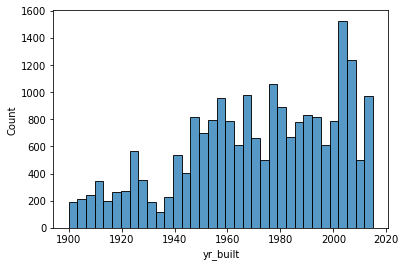

In [43]:
# Histogram of construction years
sns.histplot(data=df, x="yr_built")

The majority of houses were built in the last 50 years, but there are still a lot of houses older than 1972.

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

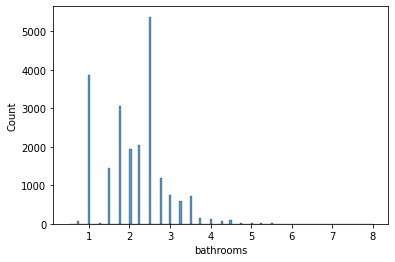

In [44]:
# Histogram of bathrooms
sns.histplot(data=df, x="bathrooms")

Most houses have bathrooms have 2.5 or less bathrooms, so this will be a limiting factor.

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

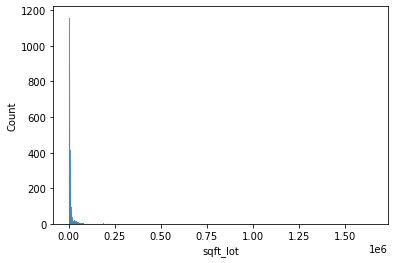

In [45]:
# Histogram of lot size
sns.histplot(data=df, x="sqft_lot")

The mean lot size in King County (15099 sqft) is inflated by some giant lots. The median lot size (7618 sqft) is close to the US median (8,177 sqft). However, my stakeholder has an unlimited budget, so I will not consider these big lots as outliers.


<AxesSubplot:xlabel='waterfront', ylabel='count'>

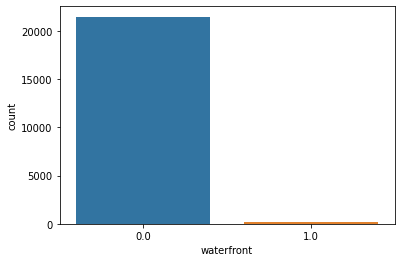

In [46]:
# Countplot of waterfront
sns.countplot(data=df, x="waterfront")

Almost all of the houses have no waterfront view, so it shouldn't be a problem.

#### Researching questions & Hypotheses

From looking at the data and the requests of the stakeholder, I formulated following research questions and hypotheses:

1. How does the age of the house correlate with renovation, condition and grade?
    - If a house is historic (> 50 years old), it either has low condition/grade, or was recently renovated and has a good condition/grade  
<br>

2. How does a nearby golf course correlate with lot size and other features?
    - If a golf course is close to the property, lot size and also other features are higher compared to properties further away

These questions were answered in the following notebooks.